<a href="https://colab.research.google.com/github/laussin86/laussin86/blob/main/Loan_Default_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

In [144]:
#1. Check the datatypes of the attributes.
df = pd.read_csv('accepted_2007_to_2018Q4.csv',
                 usecols=['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies'])
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
addr_state               object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object


In [145]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

loan_amnt                   29
term                        29
int_rate                    29
installment                 29
grade                       29
sub_grade                   29
emp_title               158091
emp_length              138230
home_ownership              29
annual_inc                  33
verification_status         29
issue_d                     29
loan_status                 29
purpose                     29
title                    23350
addr_state                  29
dti                       1675
earliest_cr_line            59
open_acc                    59
pub_rec                     59
revol_bal                   30
revol_util                1714
total_acc                   59
initial_list_status         30
application_type            30
mort_acc                 50060
pub_rec_bankruptcies      1395
dtype: int64

In [146]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2132970.0,15088.858938,9178.390329,500.00,8000.00,13000.00,20000.00,4.000000e+04
int_rate,2132970.0,13.062962,4.817119,5.31,9.49,12.62,15.99,3.099000e+01
installment,2132970.0,446.350520,266.267436,4.93,253.06,379.29,593.49,1.719830e+03
annual_inc,2132966.0,77850.143950,114443.416221,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2131324.0,18.818085,14.206969,-1.00,11.87,17.82,24.48,9.990000e+02
open_acc,2132940.0,11.609828,5.632048,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2132940.0,0.194212,0.565436,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2132969.0,16682.407312,22914.043010,0.00,5962.00,11358.00,20301.00,2.904836e+06
revol_util,2131285.0,50.396760,24.728728,0.00,31.60,50.40,69.40,8.923000e+02
total_acc,2132940.0,24.186619,11.990339,1.00,15.00,22.00,31.00,1.760000e+02


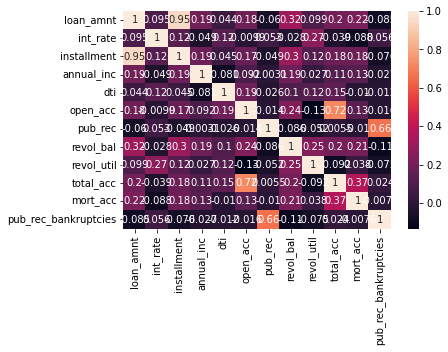

In [147]:
# correlation matrix
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

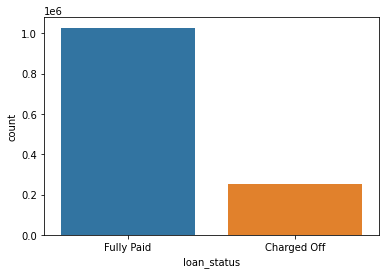

In [148]:
#4. Graph the frequency of loan status with fully paid w/o current and charged off.
df_nocurrent = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
ax = sns.countplot(x="loan_status",data=df_nocurrent)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [149]:
len(df_nocurrent['addr_state'].unique())

51

In [150]:
#create dummies for addr_state
add_state_dum = pd.get_dummies(df_nocurrent['addr_state'], drop_first=True)
add_state_dum


,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132986,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2132989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2132990,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2132994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
#I dropped addr_state and add 'add_state_dum' to df_nocurrent
df = pd.concat([df_nocurrent.drop('addr_state', axis=1), add_state_dum], axis=1)

(array([1.280093e+06, 1.730000e+02, 2.500000e+01, 1.400000e+01,
        1.300000e+01, 8.000000e+00, 9.000000e+00, 7.000000e+00,
        7.000000e+00, 1.000000e+00]),
 array([       0.,  1099920.,  2199840.,  3299760.,  4399680.,  5499600.,
         6599520.,  7699440.,  8799360.,  9899280., 10999200.]),
 <a list of 10 Patch objects>)

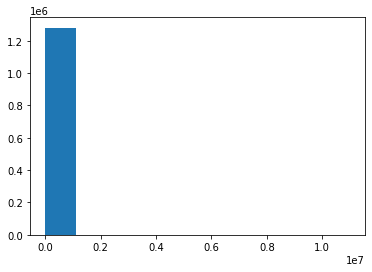

In [152]:
#distribution of annual income
plt.hist(df_nocurrent['annual_inc'])

In [153]:
# salary is highly skewed towards the right so lets find how many people has annual income more than 250,000
len(df_nocurrent[df_nocurrent['annual_inc'] > 250000])

12670

In [154]:
#or in percentage
per=12670*100/len(df) 
per

0.9895731635880813

(array([ 39928., 330224., 402846., 245056., 127221.,  55514.,  32835.,
         15318.,  10774.,   7964.]),
 array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000., 250000.]),
 <a list of 10 Patch objects>)

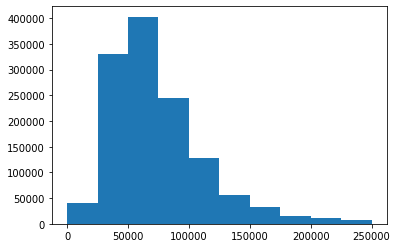

In [155]:
#so 1% so lets drop those outliers and rerun the distribution
df_nocurrent= df_nocurrent[df_nocurrent['annual_inc'] <= 250000]
plt.hist(df_nocurrent['annual_inc'])
#looks better than before

In [156]:
#check if we still have any missing values
df_nocurrent['annual_inc'].isnull().sum()

0

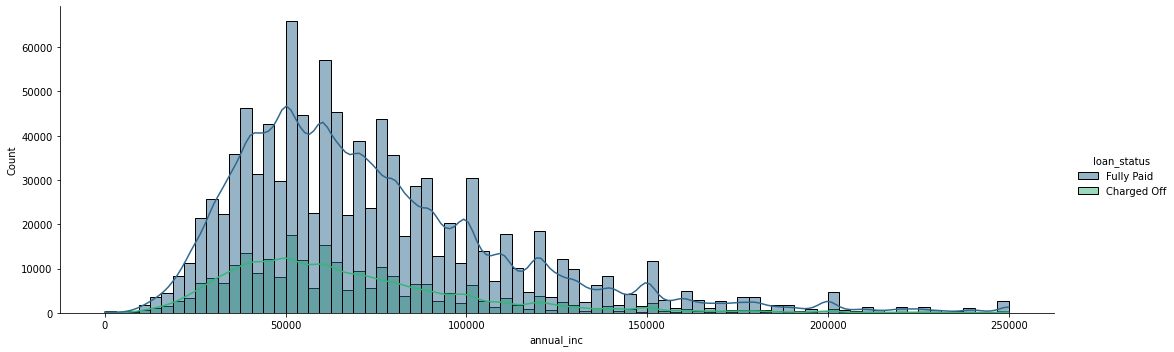

In [157]:
# lets check the annual income of people who paid off their loan vs those charged off.
sns.displot(data=df_nocurrent, x='annual_inc', hue='loan_status', bins=80, height=5, aspect=3, kde=True, palette='viridis');


In [158]:
#let's check the means
df_nocurrent.groupby('loan_status')['annual_inc'].describe()
#the 2 means differ by around $6,000

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251550.0,67896.257887,35998.537689,0.0,43000.00,60000.0,84000.0,250000.0
Fully Paid,1016130.0,73872.680132,38944.475758,0.0,46329.25,65000.0,91000.0,250000.0


In [159]:
df_nocurrent['earliest_cr_line'].head()

0    Aug-2003
1    Dec-1999
2    Aug-2000
4    Jun-1998
5    Oct-1987
Name: earliest_cr_line, dtype: object

In [ ]:
#let's keep only the month
df_nocurrent['earliest_cr_line'] = df_nocurrent['earliest_cr_line'].apply( lambda date : int(date[-4:]))

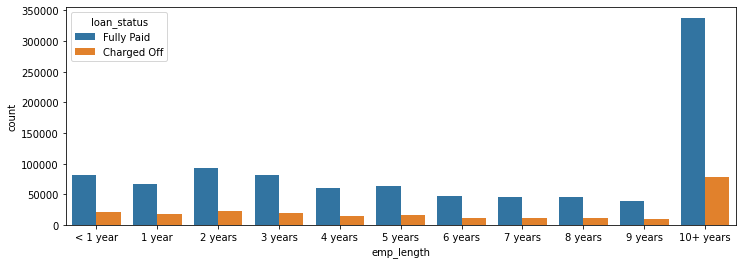

In [161]:
#let's create ascending order for emp_length and check the distribution with fully paid and charged off
emp_length_order = [ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
plt.figure(figsize=(12,4))
ax = sns.countplot(x="emp_length",data=df_nocurrent,order=emp_length_order,hue='loan_status')

In [162]:
#let check % of people charged off by year
emp_charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
per_charged_off = (emp_charged_off * 100)/(emp_charged_off + emp_fully_paid)
per_charged_off

emp_length
1 year       20.434449
10+ years    18.716634
2 years      19.621557
3 years      19.820549
4 years      19.637817
5 years      19.424297
6 years      19.281654
7 years      19.475109
8 years      19.874861
9 years      19.859735
< 1 year     20.319471
Name: loan_status, dtype: float64

In [163]:
# we noticed that the percentage is the same through the year and will not make any difference for 
#our predictions so we drop it
df_nocurrent= df_nocurrent.drop('emp_length', axis=1)

In [164]:
df_nocurrent['emp_title'].describe()

count     1186625
unique     364740
top       Teacher
freq        20141
Name: emp_title, dtype: object

In [165]:
#too many unique value so it is better to drop it
df_nocurrent= df_nocurrent.drop('emp_title', axis=1)

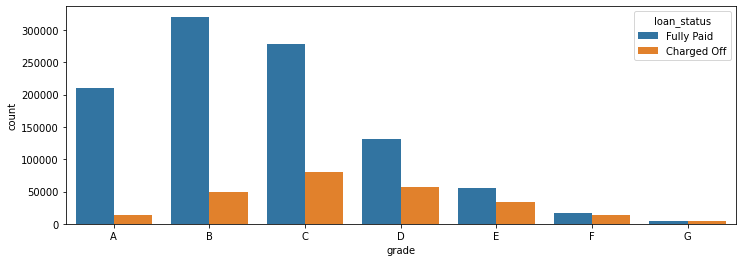

In [166]:
#lets check people grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="grade",data=df_nocurrent,order= sorted(df_nocurrent['grade'].unique()), hue='loan_status')

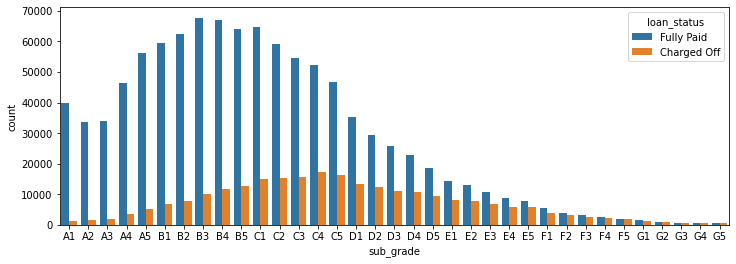

In [167]:
#lets check people sub_grade based on loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x='sub_grade',data=df_nocurrent,order= sorted(df_nocurrent['sub_grade'].unique()), hue='loan_status')

In [168]:
#information of grade is already on sub grade so let's drop  grade ande create dummies for subgrade
df_nocurrent= df_nocurrent.drop('grade', axis=1)


In [169]:
dummies_sub_grade = pd.get_dummies(df_nocurrent['sub_grade'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('sub_grade', axis=1), dummies_sub_grade], axis=1)

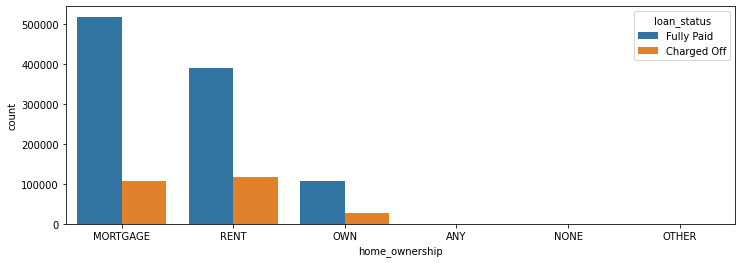

In [170]:
#let's check distribution of home ownership by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')

In [171]:
#since Any,None and other are similar let's put any and none into other
df_nocurrent['home_ownership'] = df_nocurrent['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

MORTGAGE    624766
RENT        506780
OWN         135716
OTHER          418
Name: home_ownership, dtype: int64

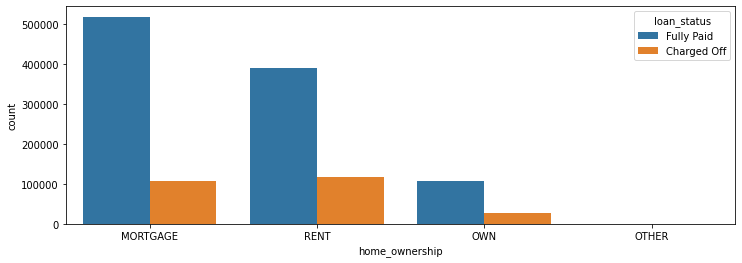

In [172]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="home_ownership",data=df_nocurrent,hue='loan_status')
df_nocurrent['home_ownership'].value_counts()

In [173]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
perc_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perc_charged_off

home_ownership
MORTGAGE    17.150581
OTHER       18.181818
OWN         20.431637
RENT        23.006827
Name: loan_status, dtype: float64

In [174]:
#visible difference so let's create dummies for the 4 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['home_ownership'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('home_ownership', axis=1), dummies_home_ownership], axis=1)

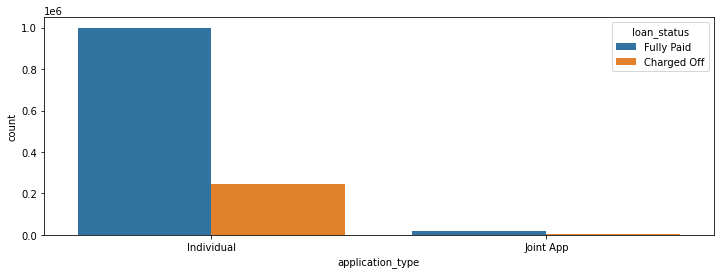

In [175]:
#let's different categories for application types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="application_type",data=df_nocurrent,hue='loan_status')


In [176]:
# let's check percentage of charged off 
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
perce_charged_off = (charged_off * 100)/(charged_off + fully_paid)
perce_charged_off

application_type
Individual    19.761034
Joint App     24.364182
Name: loan_status, dtype: float64

In [177]:
#visible difference so let's create dummies for the 2 categories and drop the original home ownership
dummies_home_ownership = pd.get_dummies(df_nocurrent['application_type'], drop_first=True)
df_nocurrent = pd.concat([df_nocurrent.drop('application_type', axis=1), dummies_home_ownership], axis=1)

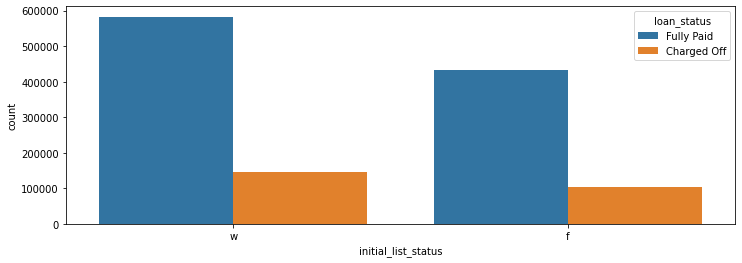

In [178]:
#let's different categories for initial list status types separated by loan_status.
plt.figure(figsize=(12,4))
ax = sns.countplot(x="initial_list_status",data=df_nocurrent,hue='loan_status')

In [179]:
charged_off = df_nocurrent[df_nocurrent['loan_status']=="Charged Off"].groupby("initial_list_status").count()['loan_status']
fully_paid = df_nocurrent[df_nocurrent['loan_status']=="Fully Paid"].groupby("initial_list_status").count()['loan_status']
percen_charged_off = (charged_off * 100)/(charged_off + fully_paid)
percen_charged_off

initial_list_status
f    19.472319
w    20.116894
Name: loan_status, dtype: float64

In [180]:
#no big difference so we can drop it
df_nocurrent= df_nocurrent.drop('initial_list_status', axis=1)

In [181]:
df_nocurrent.groupby('loan_status')['int_rate'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251550.0,15.675896,4.860683,5.31,12.29,15.05,18.54,30.99
Fully Paid,1016130.0,12.602574,4.502044,5.31,9.17,12.23,15.31,30.99


In [182]:
df_nocurrent.groupby('loan_status')['loan_amnt'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251550.0,15512.876168,8730.933670,900.0,9000.0,14300.0,20150.0,40000.0
Fully Paid,1016130.0,14033.823723,8551.218656,500.0,7500.0,12000.0,20000.0,40000.0


In [183]:
#check missing value
df_nocurrent['mort_acc'].isnull().sum()

46929

In [184]:
df_nocurrent['mort_acc'].describe()
#majority of people have between 1 and 3 account and mean is 1.66 so i will fill missing value with 2

count    1.220751e+06
mean     1.660812e+00
std      1.991111e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.100000e+01
Name: mort_acc, dtype: float64

In [185]:
df_nocurrent['mort_acc'] = df_nocurrent['mort_acc'].fillna(2)

In [186]:
df_nocurrent['mort_acc'].isnull().sum()

0

In [187]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251550.0,1.387474,1.801033,0.0,0.0,1.0,2.0,29.0
Fully Paid,1016130.0,1.744144,1.984878,0.0,0.0,1.0,3.0,51.0


In [188]:
#we notice some outliers so let drop people  with mort_acc > 10.
df_nocurrent = df_nocurrent[df_nocurrent['mort_acc'] < 11]

In [189]:
df_nocurrent.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251225.0,1.372773,1.752407,0.0,0.0,1.0,2.0,10.0
Fully Paid,1013877.0,1.719447,1.910936,0.0,0.0,1.0,3.0,10.0


In [190]:
#check missing value
df_nocurrent['total_acc'].isnull().sum()

1

In [191]:
df_nocurrent['total_acc'].describe()
#majority of people have between 23 and 32 account and mean is 24.9 so i will fill missing value with 25

count    1.265101e+06
mean     2.490332e+01
std      1.193374e+01
min      2.000000e+00
25%      1.600000e+01
50%      2.300000e+01
75%      3.200000e+01
max      1.760000e+02
Name: total_acc, dtype: float64

In [192]:
df_nocurrent['total_acc'] = df_nocurrent['total_acc'].fillna(25)

In [193]:
df_nocurrent['total_acc'].isnull().sum()

0

In [194]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,251225.0,24.700663,12.082128,2.0,16.0,23.0,31.0,176.0
Fully Paid,1013877.0,24.953541,11.896148,2.0,16.0,23.0,32.0,162.0


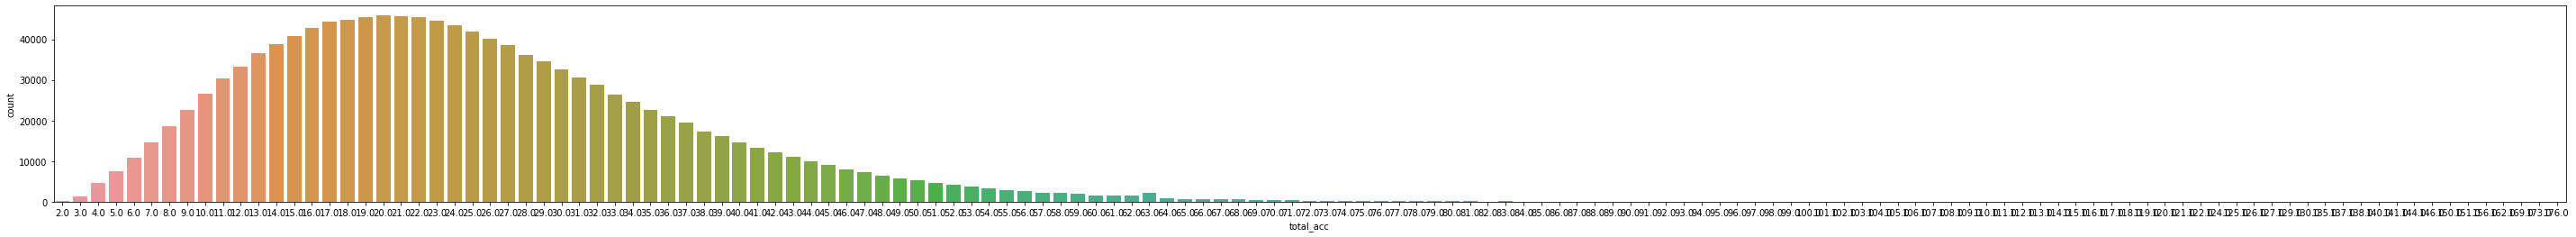

In [195]:
plt.figure(figsize=(50,4))
ax = sns.countplot(x="total_acc",data=df_nocurrent)

In [196]:
#we notice some outliers so let drop people  with total_acc > 63.
df_nocurrent = df_nocurrent[df_nocurrent['total_acc'] < 64]

In [197]:
df_nocurrent.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,249569.0,24.380620,11.431404,2.0,16.0,23.0,31.0,63.0
Fully Paid,1008040.0,24.678476,11.342244,2.0,16.0,23.0,32.0,63.0


In [198]:
df_nocurrent['open_acc'].isnull().sum()

1

In [199]:
df_nocurrent['open_acc'].describe()
#majority of people have between 11 and 14 account and mean is 11.7 so i will fill missing value with 13

count    1.257608e+06
mean     1.147221e+01
std      5.274790e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.100000e+01
75%      1.400000e+01
max      5.800000e+01
Name: open_acc, dtype: float64

In [200]:
df_nocurrent['open_acc'] = df_nocurrent['open_acc'].fillna(13)

In [201]:
df_nocurrent.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,249569.0,11.794349,5.440895,0.0,8.0,11.0,15.0,52.0
Fully Paid,1008040.0,11.392454,5.229788,0.0,8.0,10.0,14.0,58.0


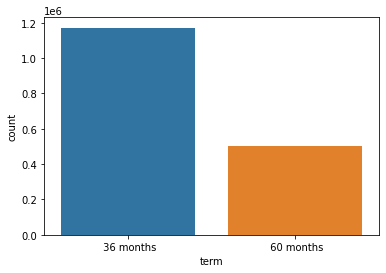

In [ ]:
ax = sns.countplot(x="term",data=df)